# Classification with Resnet

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras

In [2]:
train_path = "data/classification_train_test/train"
test_path = "data/classification_train_test/test"

In [3]:
import pathlib

train_dir = pathlib.Path(train_path)
test_dir = pathlib.Path(test_path)

In [22]:
batch_size = 32
img_height = 256
img_width = 256

In [23]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width)
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    batch_size=batch_size,
    image_size=(img_height, img_width)
)

Found 3300 files belonging to 5 classes.
Found 2200 files belonging to 5 classes.


In [24]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [40]:
base_model = tf.keras.applications.ResNet152(weights="imagenet", include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False

# tf.keras.layers.Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)),
# tf.keras.layers.Dense(1024, activation="relu"),

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(5, activation="softmax")
])

model.compile(optimizer="adam", loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=["accuracy"])

In [41]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 8, 8, 2048)        58370944  
                                                                 
 global_average_pooling2d_8  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_10 (Dense)            (None, 5)                 10245     
                                                                 
Total params: 58381189 (222.71 MB)
Trainable params: 10245 (40.02 KB)
Non-trainable params: 58370944 (222.67 MB)
_________________________________________________________________


In [45]:
history = model.fit(train_ds, epochs=20, validation_data=(test_ds))

Epoch 1/20
104/104 [==============================] - 730s 7s/step - loss: 0.5405 - accuracy: 0.7779 - val_loss: 0.6987 - val_accuracy: 0.6886
Epoch 2/20
104/104 [==============================] - 728s 7s/step - loss: 0.5135 - accuracy: 0.7912 - val_loss: 0.7028 - val_accuracy: 0.6855
Epoch 3/20
104/104 [==============================] - 727s 7s/step - loss: 0.5070 - accuracy: 0.7867 - val_loss: 0.7035 - val_accuracy: 0.6859
Epoch 4/20
104/104 [==============================] - 729s 7s/step - loss: 0.4858 - accuracy: 0.8042 - val_loss: 0.7069 - val_accuracy: 0.6882
Epoch 5/20
104/104 [==============================] - 731s 7s/step - loss: 0.4847 - accuracy: 0.8039 - val_loss: 0.7658 - val_accuracy: 0.6759
Epoch 6/20
104/104 [==============================] - 727s 7s/step - loss: 0.4834 - accuracy: 0.7964 - val_loss: 0.7288 - val_accuracy: 0.6800
Epoch 7/20
104/104 [==============================] - 726s 7s/step - loss: 0.4700 - accuracy: 0.8027 - val_loss: 0.7035 - val_accuracy: 0.6814

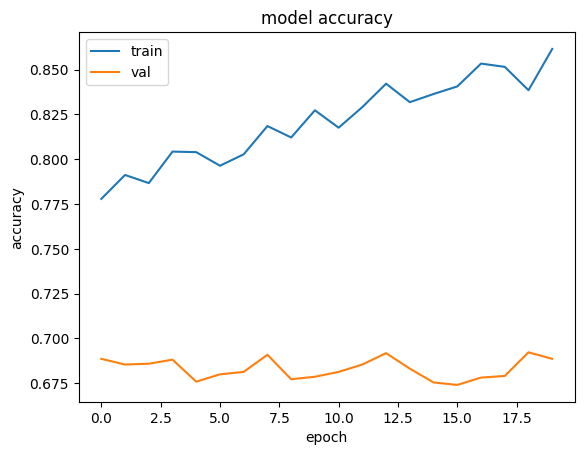

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

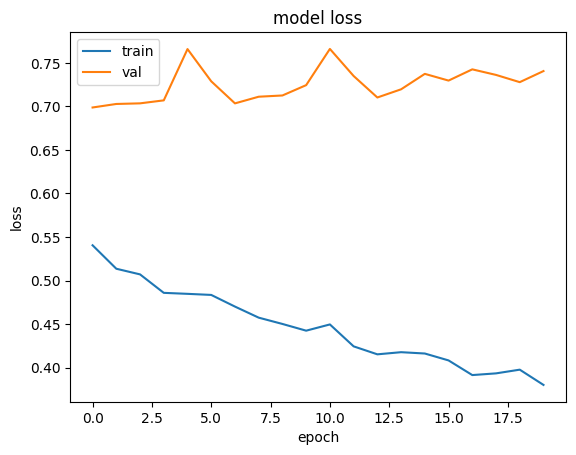

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
model.save("models/resnet_classification_1")

# What I changed:
# I didn't add the AUTOTUNE lines because I didn't know what they meant.
# I added the rescaling into the model as a layer.
# I changed the output layer to 5 instead of 10 (shouldn't change anything)
# Is number of params different for this Resnet152?
# No flatten layer

# ~51% Accuracy WITHOUT the prefetch and caching.

INFO:tensorflow:Assets written to: models/resnet_classification_1\assets


INFO:tensorflow:Assets written to: models/resnet_classification_1\assets
